線形回帰その3

In [37]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [38]:
from sklearn.datasets import load_boston

In [39]:
boston=load_boston()

In [40]:
boston_df=DataFrame(boston.data)
boston_df.columns=boston.feature_names

In [41]:
boston_df['Price']=boston.target

In [42]:
X=boston_df.RM

In [43]:
X=np.vstack(boston_df.RM)

In [44]:
Y=boston_df.Price

In [45]:
X=np.array([[value,1] for value in X])

In [46]:
np.linalg.lstsq(X,Y)

(array([  9.10210898, -34.67062078]),
 array([ 22061.87919621]),
 2,
 array([ 143.99484122,    2.46656609]))

In [47]:
a,b=np.linalg.lstsq(X,Y)[0]

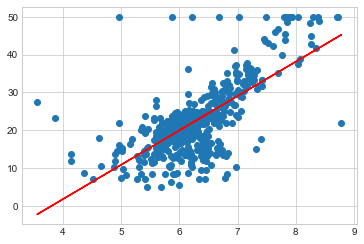

In [48]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x=boston_df.RM
plt.plot(x,a*x+b,'r')

In [49]:
result=np.linalg.lstsq(X,Y)

In [50]:
error_total=result[1]
rmse=np.sqrt(error_total/len(X))

In [51]:
print('平均二乗誤差の平方根={:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根=6.60


In [52]:
import sklearn
from sklearn.linear_model import LinearRegression

In [53]:
lreg=LinearRegression()

In [54]:
X_multi=boston_df.drop('Price',1)

In [55]:
X_multi.shape

(506, 13)

In [56]:
Y_tartget=boston_df.Price

In [57]:
lreg.fit(X_multi,Y_tartget)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
lreg.intercept_

36.491103280363404

In [59]:
len(lreg.coef_)

13

In [60]:
coerr_df=DataFrame(boston_df.columns)

In [61]:
coerr_df.columns=['Features']

In [62]:
coerr_df['Coefficient Estimate']=pd.Series(lreg.coef_)

In [63]:
coerr_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


線形回帰その4

In [91]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X_multi,boston_df.Price)

In [92]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [93]:
lreg=LinearRegression()

In [94]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
pred_train=lreg.predict(X_train)

In [96]:
pred_test=lreg.predict(X_test)

In [97]:
np.mean((Y_train-pred_train)**2)

22.35497456850087

In [98]:
np.mean((Y_test-pred_test)**2)

20.965541470573054

Text(0.5,1,'Rsidual Plots')

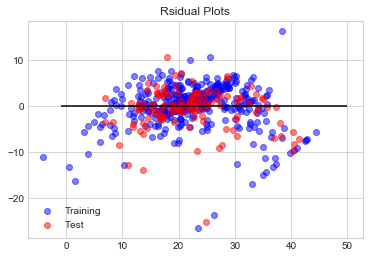

In [100]:
train=plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)
test=plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-1.0,xmax=50)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Rsidual Plots')